Pero del steepest descent SD

* Puede tomar mucho tiempo en converger. Casi no se usa
* Solo sirve para problemas lineales. Recuerde como se dedujo el $\alpha$.

Como podemos mejorar esto.

### Gradiente conjugado.

Lo inventaron: Magnus Hestenes, Eduard Stiefel y Cornelius Lanzcos (el hungaro del SVD).



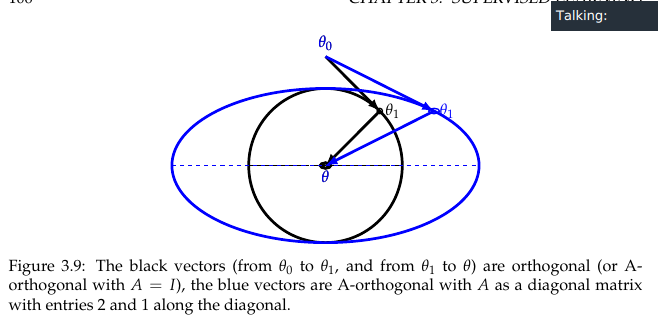

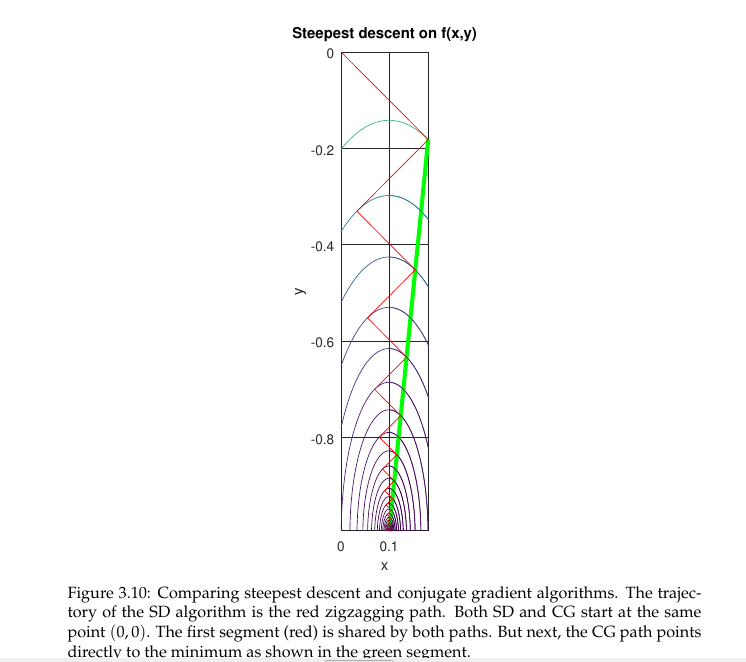

## Line search for general cost functions (busqueda de linea)

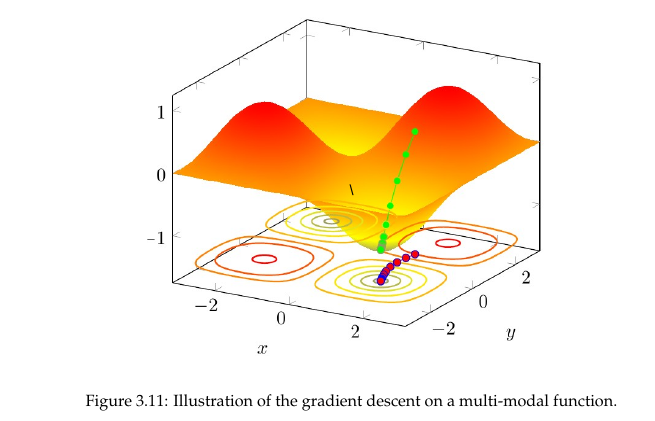

Queremos bajar al minimo. Siempre debemos tener encuenta la funcion de descenso
$$ \theta_1 = \theta_0 - \alpha \nabla J(\theta_0) $$

Quien es $\alpha$, como se encuentra?

Podemos definir una funcion univariadada de $\alpha$

$$ \varphi(\alpha) = J [ \theta_0 - \alpha \nabla J(\theta_0)]$$

En steepest descent $\varphi'(\alpha) = 0 \quad (1) $. En este caso la funcion $J$ es muy complicada y en la mayoria de los casos no se puede estimar esta deriva.

Que alternativas hay:

* Resolve la ecuaion (1) . De nuevo, la derivada de $\varphi$ casi nunca esta disponible

* Se buscan tres valores de la funcion $\varphi(\alpha)$ y se hace una interpolacion cuadratica (parabolica) y de alli se extrae el minimo.

* Usar "backtracing". Se usa un $\alpha$ grande y se comienza a reducir el tamano (a traves de las iteraciones) hasta que se considere adecuado.
En matlab el algoritmo asociado se llama so_step_armijo (un articulo Larry Armijo, 1966)

* Prueba y error. Empieza con un $\alpha$ pequeno (0.01). Con alpha pequeno se garantiza convergencia pero luego se puede incrementar (prueba y error). 
















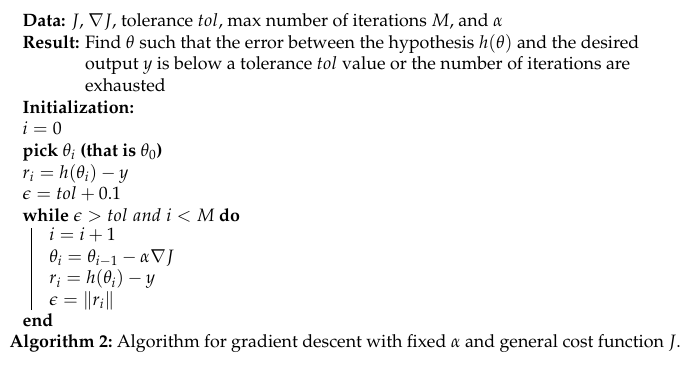

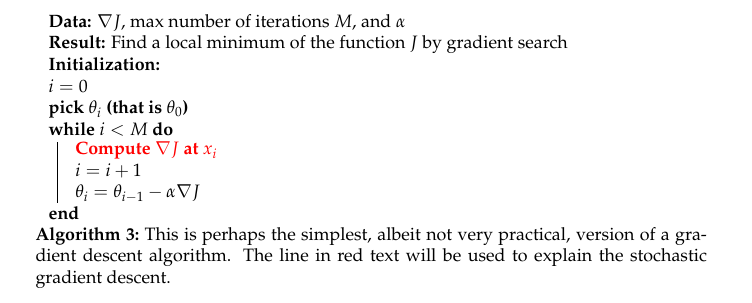

## Stochastic Gradient Descent

Motivacion:
Asumamos que tenemos un red neuronal de 10 capas ocultas (ademas de la entrada y la salida), tenemos de entrada 10000 imagenes (los concursos Kaggle yde ImageNet manejan millones de imagenes). Y cada imagen tiene  $100 \times 100$ pixeles
Cuantas conexiones hay, por que por cada conexion hay una derivada parcial (esto indica el tamano del gradiente.

$$10000 \times 100 \times 100 \times 100^{10} = 10^{28} $$



Esto para calcular la linea roja del pseudocodigo de arriba.


Como atacar este problema.

Veamos algunos ejemmplos de funciones de costo y como podemos reducir los computos.

* Minimos cuadrados:

$$ J(x, A, y) = \frac12 \| A x - y \|^2 = \frac12 \sum_{i=1}^m 
\left (  \sum_{j=1}^n (a_{ij} x_j - y_j  \right )^2 \quad (1) $$

* Regresion logistica (lo veremos en 2 o 3 clases)

$$J(\theta, x, y) = -\frac1m \sum_{i=1}^m y_i \log [ h(\theta, x^{(i)}] + (1 - y_i) \log [1 - h(\theta, x^{(i)})  \quad (2)  $$

Si fueramos a hacer regularizacion, tocaria agregar la funcion (penalti)
$R(\theta) =\frac12 \sum \theta_i^2$. Pero si le sacamos el gradiente a esto (por ejemplo
si derivamos con respecto a $\theta_j$,

$$ \frac{\partial R}{\partial \theta_j} = \frac12 \sum_{i} 2 \theta_i \delta_{ij} =   \theta_j $$

Escribamos la ecuacion (1) de la siguiente forma
\begin{eqnarray}
J(x, A, y) = \frac1m \sum_{i=1}^m C_i(x, A, y) \\
C_i(x, A, y) = \frac{m}{2} \left ( \sum_{j=1}^n (a_{ij} x_j - y_j \right )^2
\end{eqnarray}

De la segunda ecuacion (1)

\begin{eqnarray}
J(\theta, x, y) = \frac1m \sum_{i=1}^m C_i(\theta, x, y) \\
C_i(x, \theta, y) = - [ y_i \log( h(x, \theta^{(i)})] - (1 - y_i) \log [1 - h(\theta, x^{(i)}] 
\end{eqnarray}

La clave de todo esto en (Stochastic Gradient Descent) (SGD) es que en cualquier caso el gradiente es una suma sobre cada una de las muestras que se tienen (en ejemplo de las redes neuronales  las muestras son $10^8$.
Habria que calcular $10^8$ gradientes de funciones $C_i(x, A, y)$ como las de arriba. Los que crearon el SGD dijeron, *no*, solo calculemos el gradiente de *una sola muestra* pero de forma aleatoria.







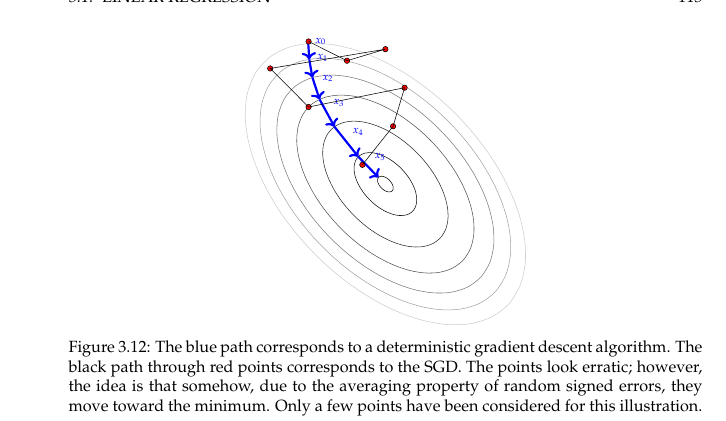

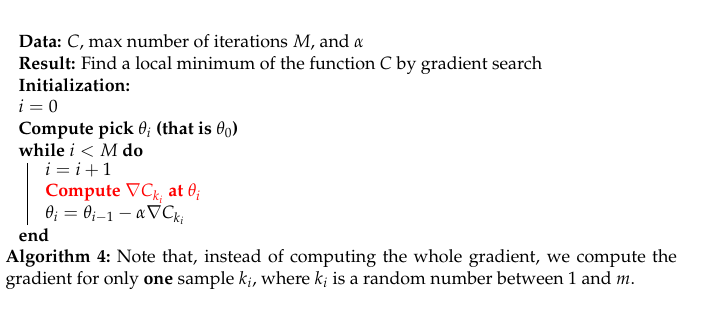

Por que funciona con un ejemplo

Asumamos que tenemos 5 puntos $(x_1, y_1), (x_2, y_2), (x_3, y_3), (x_4, y_4), (x_5, y_5)$ y que queremos ajustarlos usando minimos cuadrados (regresion lineal) pero sin intercepto (todas las lineas pasan por el origen ) (por que ? por que soy peresozo). 

La escuaciones para este problema son

\begin{eqnarray}
y_1 = \theta x_1 \\
y_2 = \theta x_2 \\
y_3 = \theta x_3 \\
y_4 = \theta x_4 \\
y_5 = \theta x_5
\end{eqnarray}

Obviamente es deficil que, a no ser que los puntos esten alineados con una recta que pasa por el origen , es decir de la forma $(a,a)$, el problema no tiene solucion. Recurrimos a los minimos cuadrados.

Definimos la funcion de costo (objetivo).

$$ J(\theta) = \frac15 \sum_{i=1}^5 (\theta x_i - y_i)^2 $$

Esto lo podemos considerar usando funciones de costo "locales"

$$C_i(\theta) = (\theta x_i - y_i)^2  $$

Calculemos el gradiente de $J$

$$\nabla J(\theta) = \frac{d J}{d \theta }  =\frac25 \sum_{i=1}^5 (\theta x_i - y_i) x_i   $$

De otro lado el gradiente de la funcion de costo local $C_i$ es

$$\nabla C_i(\theta) = \frac{d C_i }{d \theta }  = 2 x_i (\theta x_i - y_i)$$

Claramente se ve que

$$ \nabla J(\theta) = \frac15 \sum_{i=1}^n \nabla C_i (\theta)  $$

Cada funcion de costo $C_i(\theta)$ es una parabola: $(\theta x_i - y_i)^2 = x_i^2 \theta^2 - 2 \theta y_i + y_i^2 $

Por ejemplo: Escojamos los puntos $(-1,-0.5), (1,1), (3,2), (4,3), (5,6) $
Las funciones de costo son:

\begin{eqnarray}
C_1(\theta) &=& (-\theta + 0.5)^2   \quad \text{minimo esta en $\theta=0.5$} \\
C_2(\theta) &=& (\theta - 1)^2   \quad \text{minimo esta en $\theta=1$} \\
C_3(\theta) &=& (3 \theta - 2 )^2   \quad \text{minimo esta en $\theta=0.667$} \\
C_4(\theta) &=& (4\theta - 3)^2   \quad \text{minimo esta en $\theta=0.75$}  \\
C_5(\theta) &=& (5 \theta - 6)^2   \quad \text{minimo esta en $\theta=1.25$}   
\end{eqnarray}


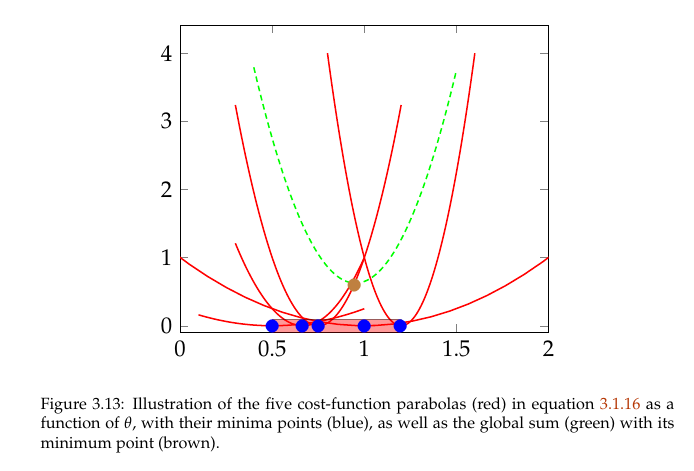

Los gradientes "locales"

\begin{eqnarray}
\nabla C_1(\theta) &=& -2 ( -\theta + 0.5) \\
\nabla C_2(\theta) &=& 2(\theta -1 ) \\
\nabla C_3 (\theta) &=& 6( 3 \theta - 2) \\
\nabla C_4 (\theta ) &=& 8 ( 4 \theta - 3) \\
\nabla C_5 ( \theta ) &=& 10 ( 5 \theta - 6) 
\end{eqnarray}

y 
$$ \nabla J(\theta) = \frac15 [ -2 ( -\theta + 0.5) +2(\theta -1 )  + 6( 3 \theta - 2) +   8 ( 4 \theta - 3) + 10 ( 5 \theta - 6) ]$$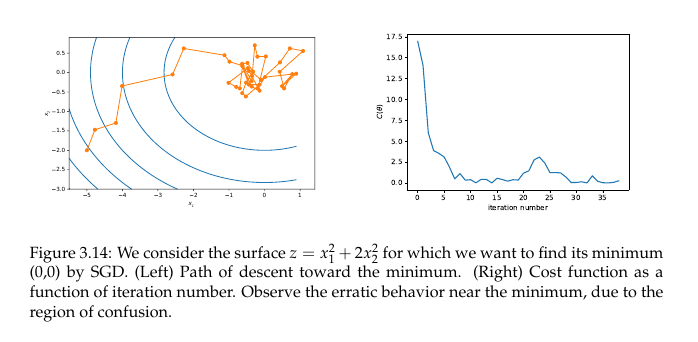




Formulamos 3 preguntas interesantes con respecto a la metodologia:

* Que pasa cuando estamos dentro de la zona de confusion
* Podemos estimar la incertidumbre del metodo
* Como podemos mejorar el parametro de aprendizaje (learning parameter) $\alpha$.

1) Cuando estamos en la zona de confusion necesitamos mejorar la aproximacion. Una forma de mejorarla es reducir el tamano de $\alpha$. 
Por ejemplo de acuerdo la iteracion. Estamos en la iteracion $i$,
podriamos decir que $\alpha  \leftarrow \frac{\alpha}{i + C} , C>0 $

Otra posibilidad es promediando gradientes (a esto lo llamamos *minibach* y lo explico en detalles mas adelante)

2) Para estimar la incertidumbre usamos estadistica.

Comenzamos con la esperanza (Expected Value)

Recuerde que los $\nabla C_i(\theta)$ y que

$$ E[ \nabla C_i] = \frac1m \sum_{i=1}^m \nabla C_i(\theta) = \nabla J(\theta)  $$

Si la distribucion no es uniforme

$$ E[\nabla C_i] = \sum_{i=1}^m \mu_i \nabla C_i (\theta) = J(\theta)  $$
$\mu_i$ representa la probabilidad de $\nabla C_i(\theta) $ .

La varianza es la segunda estadistica importante.

$$ V[ \nabla [ C_i(\theta] ] = \frac{1}{m-1} \sum_{i=1}^m \| \nabla C_i(\theta) - \nabla J(\theta) \|^2  $$

Volviendo al primero punto, una forma de suavizar la trayectoria y acercanos mas al centro es promediano algunos valores (minibatch).


## Minibatch gradient descent.

La idea es la siguiente. Podemos formar $k$ grupos en los datos.
Por decir algo si los datos $m=115$ y tenemos $k+1=11$ , 
cada grupo de 11 y uno de 5. 11 grupos de 10 y uno de 5

Debes escoger $k$ grupos $1 < k < m$. Si $k=1$ se llama batch gradient descent y se toman todos los datos. Si $k=m$ entonces tienes grupos de a uno, y esto es SGD. 

El algortimo:






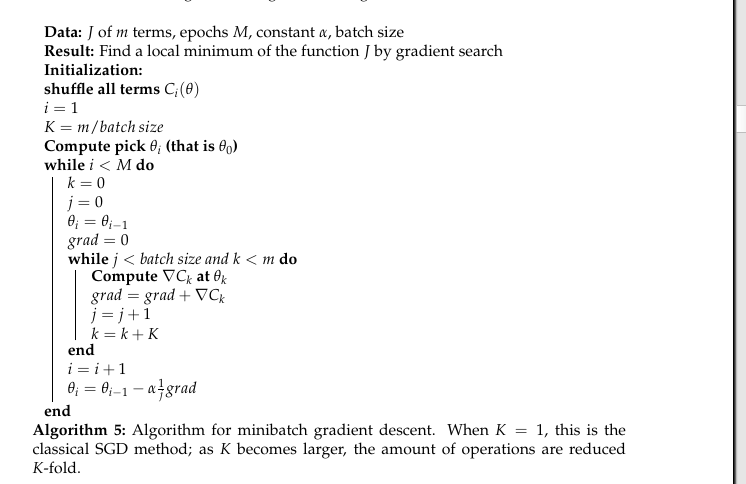

Notas adicionales sobre metodos modernos de descenso de gradiente.

Habiamos mencionado el gradiente no lineal, y de entro de estos
el metodo L-BFGS que es un quasi-Newton.

Hay unas tecnicas que yo enseno en DL (Deep Learning) que se llaman aceleradores. Se trata de disenar el valor de $\alpha$ (constante, o variable, o vector , o escalar)

* Momentum (Poliak, Ruso, 62)
* Nesterov (Nesterov, Ruso, alumno de Poliak)
* AdaGrad (??)
* RMSprop
* Adam